### Численное интегрирование

#### 1. Стандартный алгоритм

Пусть требуется приближенно вычислить $l$-кратный интеграл 

$$I=\int_{R^{l}}{g(\mathbf{x})d\mathbf{x}}$$

Здесь $d\mathbf{x}=dx_{1}dx_{2}...dx_{l}$, т.е. вычисляется интеграл Римана.

Выберем плотность распределения $f(\mathbf{x})$ случайного вектора $\mathbf{\xi}=\left(\xi_1,...\xi_l\right)$ в $R^{l}$, такую что
1. $f(\mathbf{x})\geq 0$;
2. $\int{f(\mathbf{x})dx}=1$ и
3. $f(\mathbf{x})\neq 0$ при $g(\mathbf{x})\neq 0$ дя $\mathbf{x} \in R^{l}$.

Тогда 

$$I=\int_{R^{l}}{g(\mathbf{x})d\mathbf{x}}=\int_{R^{l}}{q(\mathbf{x})f(\mathbf{x})d\mathbf{x}}=E\mathbf{\zeta}$$ 

где $q(\mathbf{x})=\frac{g(\mathbf{x})}{f(\mathbf{x})}$ и $\mathbf{\zeta}=q(\mathbf{\xi})$ при $\mathbf{\xi}\sim f(\mathbf{x})$.

**Алгоритм**
1. Реализуем $n$ выборочных значений $\xi_{1},...\xi_{n}$ случайного вектора $\mathbf{\xi}$ согласно выбранной плотности $f(x)$.
2. Вычисляем приближенное значение интеграла

$$ I \approx \frac{1}{n}\sum_{i=1}^{n}{q(\xi_{i})}$$

Оценка ошибки:

$$\sigma^{2}=Dq(\xi)=Eq^{2}(x)-(Eq(x))^2=\int{q^{2}(x)f(x)dx}-I^2=\int{\frac{g^{2}(x)}{f(x)}dx} - I^2$$



**Пример 1**

$$\int_{0}^{\sqrt{3}}{\frac{xdx}{\sqrt{x^4+16}}}=\frac{ln2}{2}$$

1. $f(x)=\frac{1}{\sqrt{3}}, x\in(0,\sqrt{3})$

   $q(x)=\frac{\sqrt{3}x}{\sqrt{x^4+16}}$

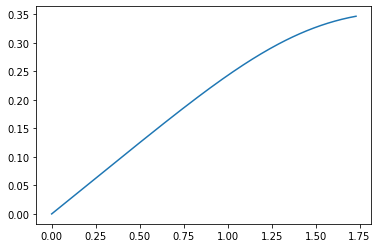

In [6]:
import numpy as np
import matplotlib.pyplot as plt
x = np.arange(0,3**0.5, 0.01)
y = x/ (x ** 4 + 16) ** 0.5
plt.plot(x,y)

I =  0.3467827367423872 0.34657359027997264
D =  0.033747800398983036


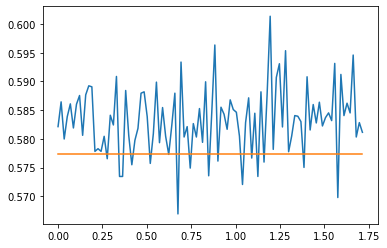

In [11]:

import numpy as np
import matplotlib.pyplot as plt
import math

def q(x):
    return np.sqrt(3) * x / np.sqrt(x ** 4 + 16)


N = 1000000
# "стандартные случайные величины"
gamma = np.random.random(N)
# розыгрыш сл. величины, распределенной с плотностью f(x)
x = 3**0.5 * gamma
I = q(x).sum() / N
print('I = ', I, math.log(2)/2)
# дисперсия
D = (q(x) ** 2).sum() / N - I ** 2
print('D = ', D)
# гистограмма
fr, X = np.histogram(x, bins=100)

# нормирование для сопоставления с плотностью
X = X[:-1]
fr = fr / N * 100 / (max(X) - min(X))
# плотность
Y = np.ones(len(X)) / 3**0.5
# вывод графиков
plt.plot(X, fr)
plt.plot(X, Y)
plt.show()


2. $f(x)=\frac{2}{3}x, x\in(0,\sqrt{3})$

   $q(x)=\frac{3}{2\sqrt{x^4+16}}$

I =  0.34658439268361374 0.34657359027997264
D =  0.0005426150955070014


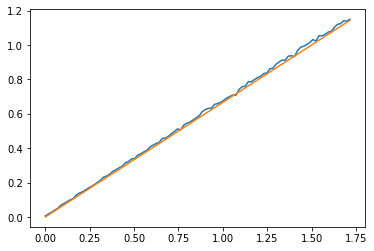

In [12]:

import numpy as np
import matplotlib.pyplot as plt
import math

def q(x):
    return 1.5 / np.sqrt(x ** 4 + 16)

N = 1000000
# "стандартные случайные величины"
gamma = np.random.random(N)
# розыгрыш сл. величины, распределенной с плотностью f(x)
x = (3 * gamma) ** 0.5
I = q(x).sum() / N
print('I = ', I, math.log(2)/2)
# дисперсия
D = (q(x) ** 2).sum() / N - I ** 2
print('D = ', D)
# гистограмма
fr, X = np.histogram(x, bins=100)

# нормирование для сопоставления с плотностью
X = X[:-1]
fr = fr / N * 100 / (max(X) - min(X))
# плотность
Y = 2 / 3 * X
# вывод графиков
plt.plot(X, fr)
plt.plot(X, Y)
plt.show()

3. $f(x)=\frac{x^2}{\sqrt{3}}, x\in(0,\sqrt{3})$

   $q(x)=\frac{\sqrt{3}}{x\sqrt{x^4+16}}$

I =  0.3465676847137067 0.34657359027997264
D =  0.052707578699684746


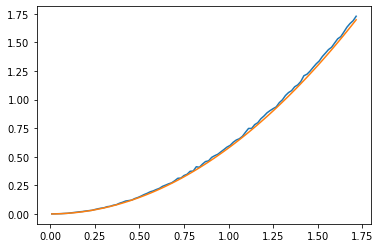

In [10]:
import numpy as np
import matplotlib.pyplot as plt
import math

def q(x):
    return 3 ** 0.5 / (x* np.sqrt(x ** 4 + 16))

N = 1000000
# "стандартные случайные величины"
gamma = np.random.random(N)
# розыгрыш сл. величины, распределенной с плотностью f(x)
x = np.power(27 **0.5 * gamma, 1/3)
I = q(x).sum() / N
print('I = ', I, math.log(2)/2)
# дисперсия
D = (q(x) ** 2).sum() / N - I ** 2
print('D = ', D)
# гистограмма
fr, X = np.histogram(x, bins=100)

# нормирование для сопоставления с плотностью
X = X[:-1]
fr = fr / N * 100 / (max(X) - min(X))
# плотность
Y = X ** 2 / 3 **0.5
# вывод графиков
plt.plot(X, fr)
plt.plot(X, Y)
plt.show()

**Пример 2**

$$\int_{0}^{\frac{\pi}{4}}{x tg^2(x)}=\frac{\pi}{4}-\frac{\pi^2}{32}+ln\left(\frac{\sqrt{2}}{2}\right)$$

1. $f(x)=\frac{4}{\pi}, x\in(0,\frac{\pi}{4})$

   $q(x)=\frac{\pi}{4}x tg^2(x)$

I =  0.13045949599169415 0.1303994355834331
D =  0.026549969302181602


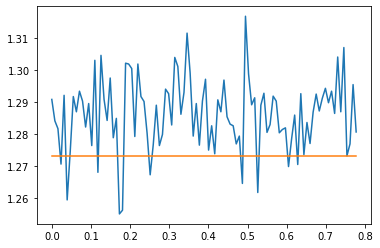

In [16]:

import numpy as np
import matplotlib.pyplot as plt
import math

def q(x):
    return np.pi / 4 * x* np.tan(x) ** 2

N = 1000000
# "стандартные случайные величины"
gamma = np.random.random(N)
# розыгрыш сл. величины, распределенной с плотностью f(x)
x = np.pi / 4 * gamma
I = q(x).sum() / N
print('I = ', I, np.pi/4 - np.pi ** 2/32 + math.log(1/2**0.5))
# дисперсия
D = (q(x) ** 2).sum() / N - I ** 2
print('D = ', D)
# гистограмма
fr, X = np.histogram(x, bins=100)

# нормирование для сопоставления с плотностью
X = X[:-1]
fr = fr / N * 100 / (max(X) - min(X))
# плотность
Y = np.ones(len(X)) * 4 / np.pi
# вывод графиков
plt.plot(X, fr)
plt.plot(X, Y)
plt.show()

2. $f(x)=\frac{1024}{\pi^4} x^3, x\in(0,\frac{\pi}{4})$

   $q(x)=\frac{\pi^4}{1024}\frac{tg^2(x)}{x^2}$

I =  0.1304006834634367 0.1303994355834331
D =  0.00022204683586640392


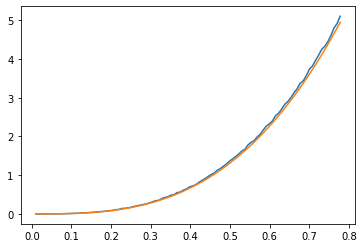

In [21]:

import numpy as np
import matplotlib.pyplot as plt
import math

def q(x):
    return (np.pi/ 4) ** 4 * np.tan(x) ** 2 / (4 * x ** 2)

N = 1000000
# "стандартные случайные величины"
gamma = np.random.random(N)
# розыгрыш сл. величины, распределенной с плотностью f(x)
x = np.pi / 4 * np.power(gamma, 1/4)
I = q(x).sum() / N
print('I = ', I, np.pi/4 - np.pi ** 2/32 + math.log(1/2**0.5))
# дисперсия
D = (q(x) ** 2).sum() / N - I ** 2
print('D = ', D)
# гистограмма
fr, X = np.histogram(x, bins=100)

# нормирование для сопоставления с плотностью
X = X[:-1]
fr = fr / N * 100 / (max(X) - min(X))
# плотность
Y = X ** 3 * 1024 / np.pi ** 4
# вывод графиков
plt.plot(X, fr)
plt.plot(X, Y)
plt.show()

3. $f(x)=\frac{4}{4 - \pi} tg^2(x), x\in(0,\frac{\pi}{4})$

   $q(x)=\frac{4 - \pi}{4}x$

I =  0.13032742883334142 0.1303994355834331
D =  0.0009807010346283805


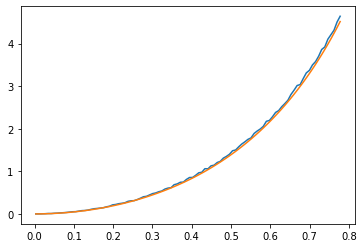

In [3]:
import numpy as np
import matplotlib.pyplot as plt
import math

def q(x):
    return (4 - np.pi) / 4 * x

N = 1000000
# "стандартные случайные величины"
gamma = np.random.random(N)
# розыгрыш сл. величины, распределенной с плотностью f1(x)
G1 = 2 * np.pi ** 3 / (3 * 64) 
ksi1 = np.power(3 * gamma * G1 / 2, 1/3)
# равномерное распределение под графиком
alpha = np.random.random(N)
eta = alpha * 2 * ksi1 ** 2
# отбор
ksi = ksi1[eta < np.tan(ksi1) ** 2]

I = q(ksi).sum() / len(ksi)
print('I = ', I, np.pi/4 - np.pi ** 2/32 + math.log(1/2**0.5))
# дисперсия
D = (q(ksi) ** 2).sum() / len(ksi) - I ** 2
print('D = ', D)
# гистограмма
fr, X = np.histogram(ksi, bins=100)

# нормирование для сопоставления с плотностью
X = X[:-1]
fr = fr / len(ksi) * 100 / (max(X) - min(X))
# плотность
Y = 4/(4-np.pi) * np.tan(X) ** 2
# вывод графиков
plt.plot(X, fr)
plt.plot(X, Y)
plt.show()